In this dataset, there are more no. of columns and hence data is very dense. So, Support Vector Machine (SVM) algorithm is preferred to classify the data points into classes. 

# Task 1: Exploratory Data Analysis (EDA)  

# Task 2: Data Preprocessing

# Task 3: Data Visualization


Load the Mushroom dataset and perform fundamental data exploration.

In [1]:
import warnings
warnings.filterwarnings('ignore')  # use to avoid warning in the code

In [2]:
import pandas as pd # import pandas lib using it's short form

In [3]:
data = pd.read_csv(r'mushroom.csv', header=0) #read dataset and save in var. data (0th row as header)

In [4]:
data.head() # display top 5 rows

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter,class
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,14.276173,5.054983,poisonous
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,3.952715,19.068319,edible
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,9.054265,7.205884,poisonous
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,5.226499,20.932692,poisonous
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,14.037532,12.545245,poisonous


In [5]:
data = data.drop('Unnamed: 0', axis =1)  # delete the mentioned column (bidefault axis =0 for rows, so pass axis =1 for column)

In [6]:
data.head() # display top 5 rows

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter,class
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,14.276173,5.054983,poisonous
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,3.952715,19.068319,edible
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,9.054265,7.205884,poisonous
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,5.226499,20.932692,poisonous
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,14.037532,12.545245,poisonous


In [7]:
data.shape  # display no. of rows , no. of columns in the dataset

(2000, 25)

In [8]:
data.info()   # gives info about null values and data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

In [9]:
data.isnull().sum()  # null values in each column (there is no null values in the dataset)

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
stalk_height                0
cap_diameter                0
class                       0
dtype: int64

In [10]:
data.dtypes # data type of each column

cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
stalk_height                float64
cap_diameter                float64
class                        object
dtype: object

In [11]:
data[data.duplicated()] # print duplicated rows

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter,class
34,bell,smooth,pink,no,foul,notched,distant,broad,pink,enlarging,...,universal,brown,one,zone,black,scattered,leaves,5.291009,5.436304,poisonous
70,sunken,scaly,yellow,no,pungent,descending,distant,narrow,orange,enlarging,...,partial,white,none,zone,white,numerous,leaves,4.746453,10.769935,poisonous
76,conical,grooves,brown,no,foul,free,distant,broad,white,tapering,...,partial,yellow,two,large,chocolate,solitary,woods,12.206952,5.061715,poisonous
109,sunken,smooth,white,no,anise,attached,crowded,broad,black,tapering,...,partial,brown,two,sheathing,black,solitary,woods,13.214007,14.549171,edible
127,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,14.276173,5.054983,poisonous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,flat,grooves,green,yes,musty,notched,crowded,broad,chocolate,enlarging,...,universal,yellow,one,zone,brown,abundant,meadows,14.834383,2.053744,poisonous
1994,flat,scaly,pink,no,spicy,attached,distant,narrow,red,enlarging,...,universal,brown,two,zone,brown,abundant,meadows,4.794826,4.576464,poisonous
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,5.877891,17.464145,poisonous
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,13.558064,11.270020,poisonous


In [12]:
data = data.drop_duplicates()  # remove duplicated rows 

In [13]:
data[data.duplicated()] # print duplicated rows (It means there is no duplicated rows in the dataset now)

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter,class


Utilize histograms, box plots, or density plots to understand feature distributions.

since, boxplot and density plot are applicable only on numeric data, therefore, first convert categorical data into numeric data using Label Encoding

# Encode categorical variables

In [14]:
data.columns # shows all columns in our dataset

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat',
       'stalk_height', 'cap_diameter', 'class'],
      dtype='object')

In [15]:
colname =[] # blank list for storing all categorical features in the dataset
for x in data.columns:  # x can be any column like cap_shape, cap_surface etc.
    if data[x].dtypes=='object':  # compare data type of each column with object
        colname.append(x)  # if above condition satisfied, append that column to the colname list
        
colname   # finally all categorical columns in our dataset will be stored in this list
    

['cap_shape',
 'cap_surface',
 'cap_color',
 'bruises',
 'odor',
 'gill_attachment',
 'gill_spacing',
 'gill_size',
 'gill_color',
 'stalk_shape',
 'stalk_root',
 'stalk_surface_above_ring',
 'stalk_surface_below_ring',
 'stalk_color_above_ring',
 'stalk_color_below_ring',
 'veil_type',
 'veil_color',
 'ring_number',
 'ring_type',
 'spore_print_color',
 'population',
 'habitat',
 'class']

In [16]:
from sklearn.preprocessing import LabelEncoder  # import LabelEncoder function from sublib. preprocessing
le = LabelEncoder()  # save this function in var. le
for x in colname: # x can be any column like sunken, flat etc.
    data[x] = le.fit_transform(data[x]) # it will tranform each categorical column into numeric column using LabelEncoder func
    le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))  # representation in dictionary format 
    print('Feature',x)
    print('mapping', le_name_mapping)

Feature cap_shape
mapping {'bell': 0, 'conical': 1, 'convex': 2, 'flat': 3, 'sunken': 4}
Feature cap_surface
mapping {'fibrous': 0, 'grooves': 1, 'scaly': 2, 'smooth': 3}
Feature cap_color
mapping {'brown': 0, 'buff': 1, 'gray': 2, 'green': 3, 'pink': 4, 'purple': 5, 'red': 6, 'white': 7, 'yellow': 8}
Feature bruises
mapping {'no': 0, 'yes': 1}
Feature odor
mapping {'almond': 0, 'anise': 1, 'creosote': 2, 'fishy': 3, 'foul': 4, 'musty': 5, 'none': 6, 'pungent': 7, 'spicy': 8}
Feature gill_attachment
mapping {'attached': 0, 'descending': 1, 'free': 2, 'notched': 3}
Feature gill_spacing
mapping {'close': 0, 'crowded': 1, 'distant': 2}
Feature gill_size
mapping {'broad': 0, 'narrow': 1}
Feature gill_color
mapping {'black': 0, 'brown': 1, 'buff': 2, 'chocolate': 3, 'gray': 4, 'green': 5, 'orange': 6, 'pink': 7, 'purple': 8, 'red': 9, 'white': 10, 'yellow': 11}
Feature stalk_shape
mapping {'enlarging': 0, 'tapering': 1}
Feature stalk_root
mapping {'bulbous': 0, 'club': 1, 'cup': 2, 'equal':

In [17]:
data.head() # display top 5 rows (every column is numerical now)

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter,class
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,14.276173,5.054983,1
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,3.952715,19.068319,0
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,9.054265,7.205884,1
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,5.226499,20.932692,1
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,14.037532,12.545245,1


# Investigate feature correlations to discern relationships within the data

In [18]:
import seaborn as sns

In [19]:
import matplotlib.pyplot as plt

<AxesSubplot:>

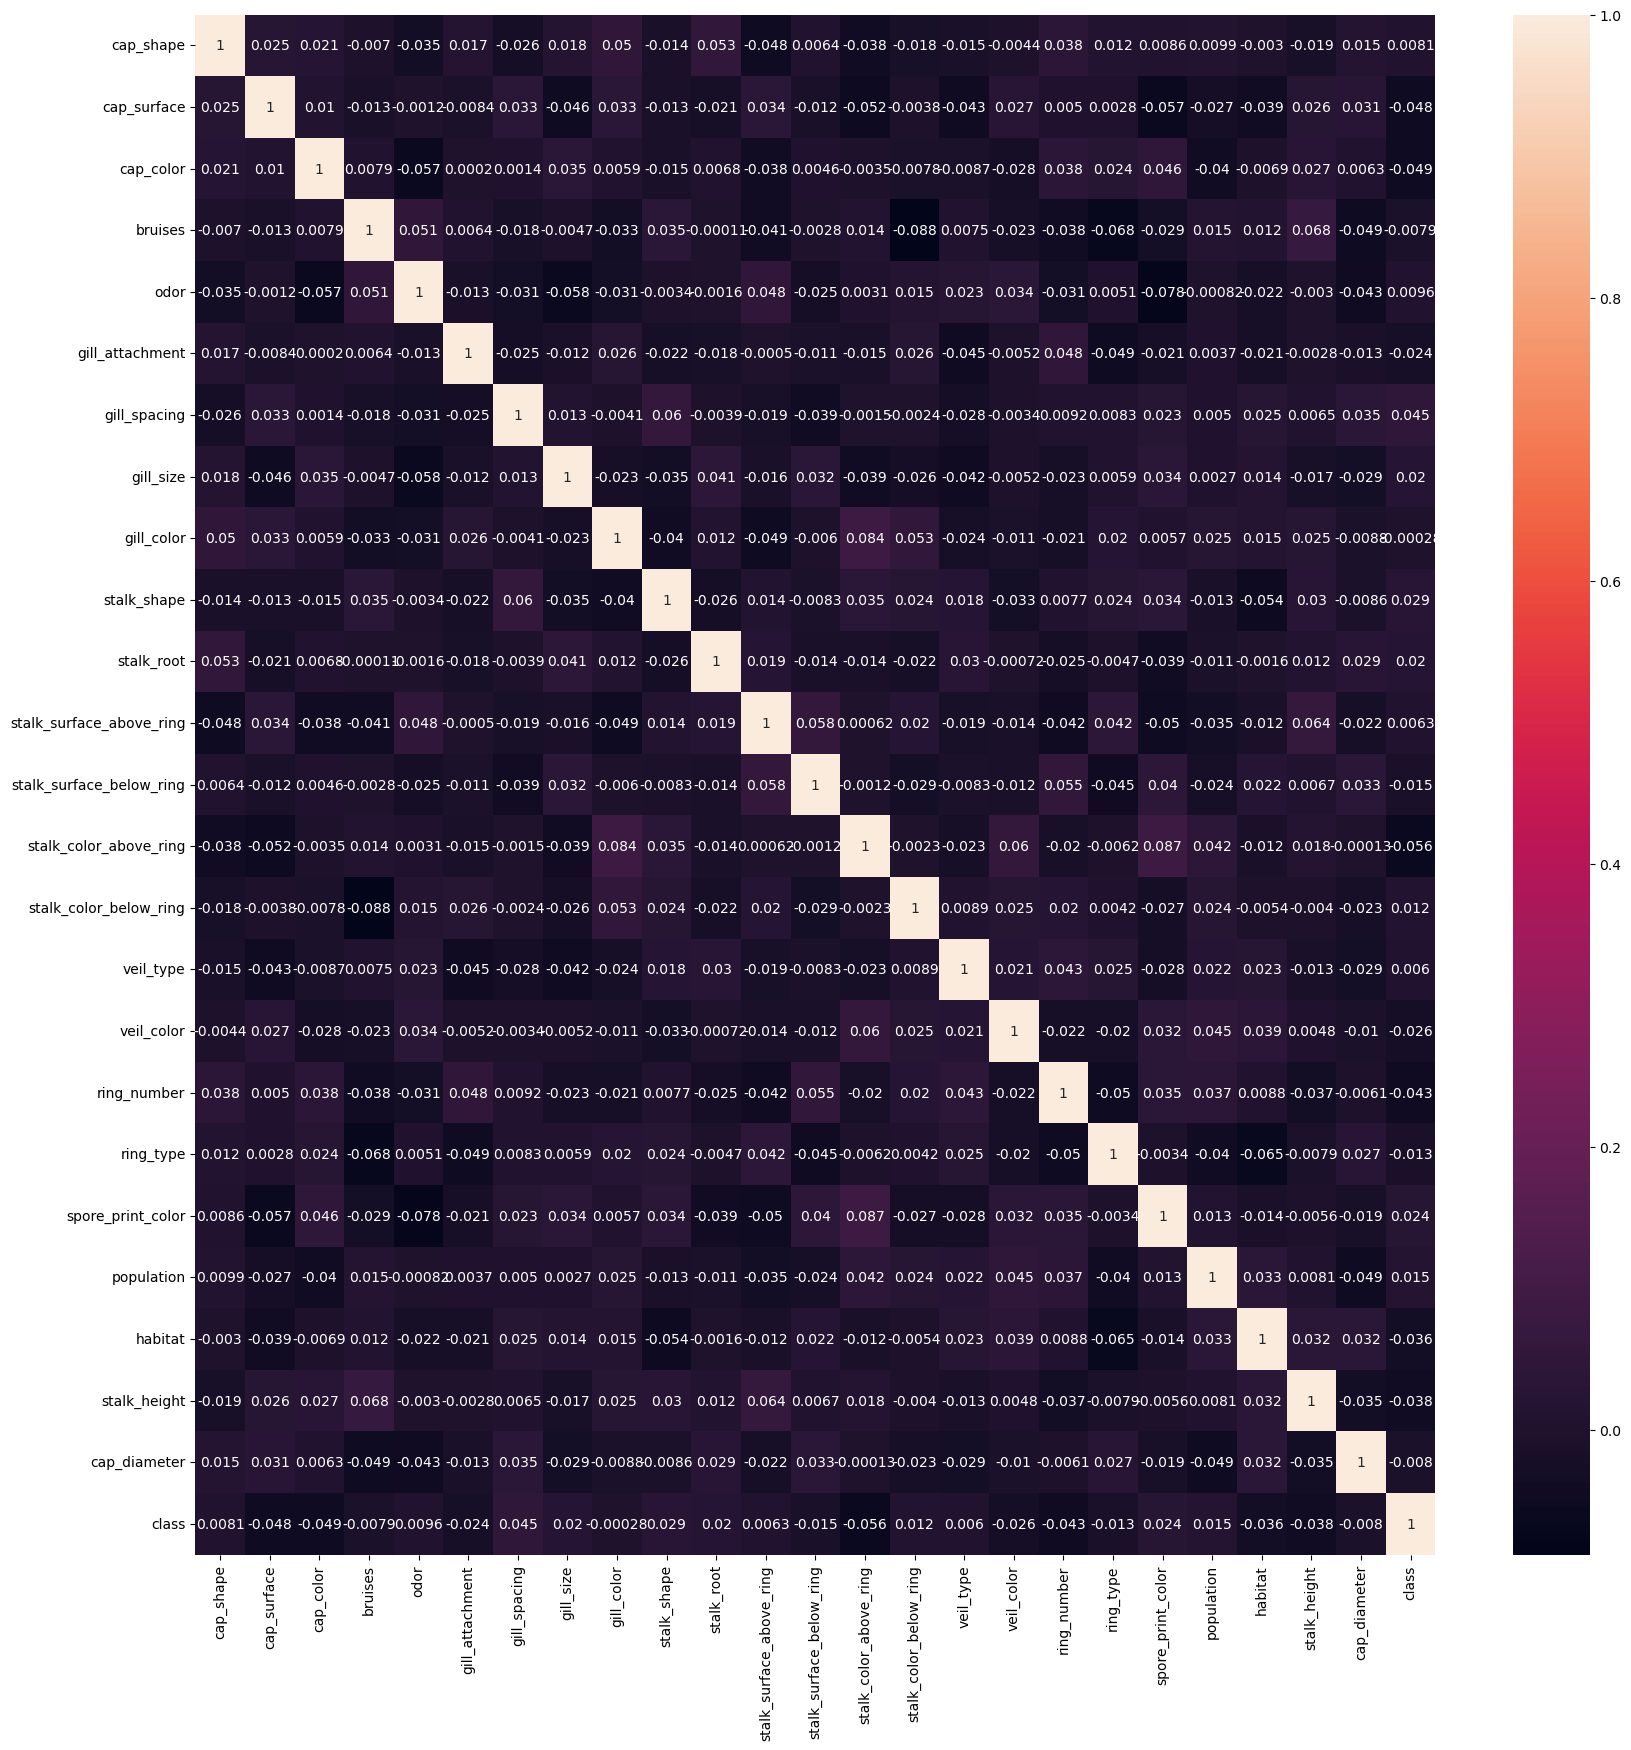

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot = True) # heatmap (shows correlation among all the features)

Correlation matrix shows that gill_spacing is the most important feature in deciding the class of mushroom i.e. gill_spacing plays a vital role in deciding whether mushroom is edible or poisonous 

# Utilize histograms, box plots, or density plots to understand feature distributions.

<AxesSubplot:>

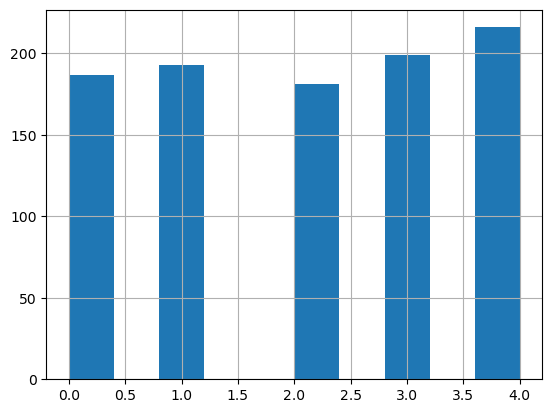

In [21]:
data['cap_shape'].hist() # plot histogram

there are 5 cap shapes of mushroom given in our dataset: sunken, flat, bell, convex, conical and after using Label Encoder, we are getting corresponding values of these cap shapes as 0,1,2,3,4 (as shown in histogram)

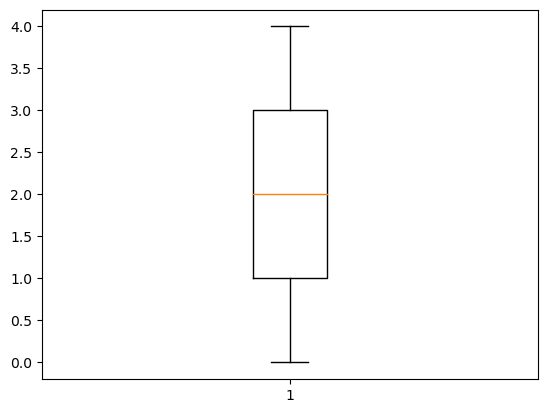

In [22]:
plt.boxplot(data['cap_shape']) # plot boxplot for the mentioned column
plt.show()

values of cap shape of mushroom are in the range of 0 to 4 (there is no outlier in this column and hence data is normally distributed)

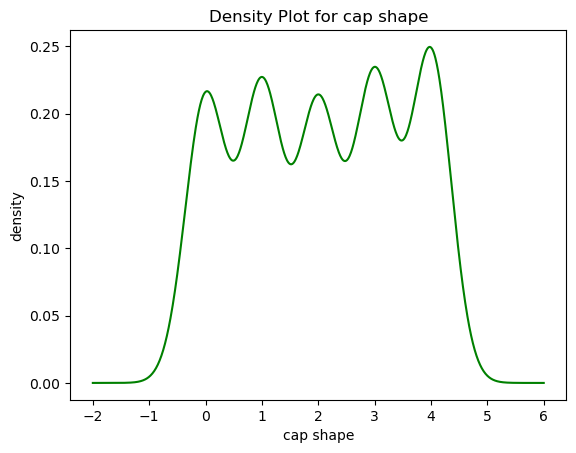

In [23]:
data['cap_shape'].plot.density(color='green')  # plot the density plot for the mentioned column
plt.xlabel('cap shape')
plt.ylabel('density')
plt.title('Density Plot for cap shape') 
plt.show()

The highest peak/density (as represented on the y-axis) was found to be at the cap shape value of 4 

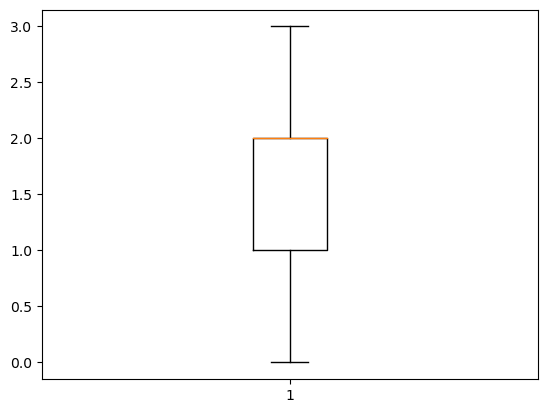

In [24]:
plt.boxplot(data['cap_surface']) # plot boxplot for the mentioned column
plt.show()

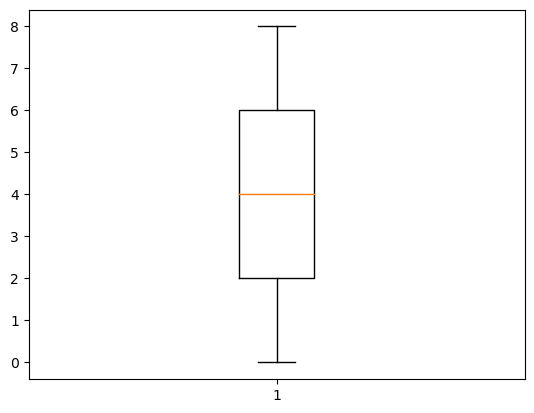

In [25]:
plt.boxplot(data['cap_color']) # plot boxplot for the mentioned column
plt.show()

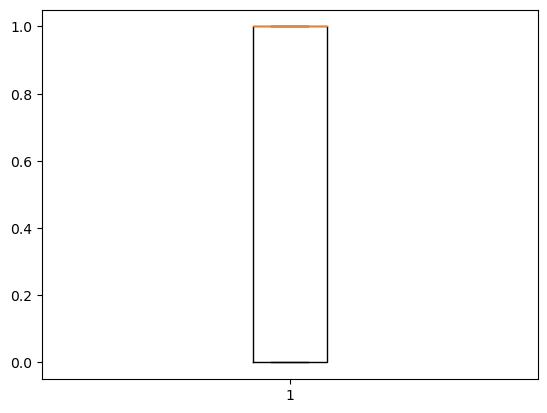

In [26]:
plt.boxplot(data['bruises']) # plot boxplot for the mentioned column
plt.show()

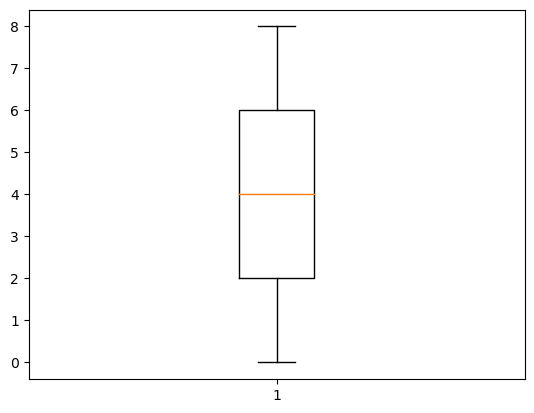

In [27]:
plt.boxplot(data['odor']) # plot boxplot for the mentioned column
plt.show()

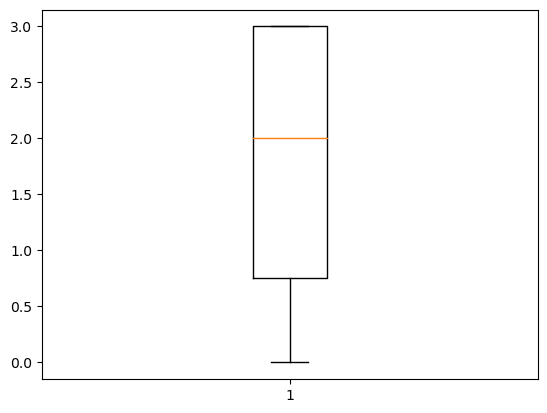

In [28]:
plt.boxplot(data['gill_attachment']) # plot boxplot for the mentioned column
plt.show()

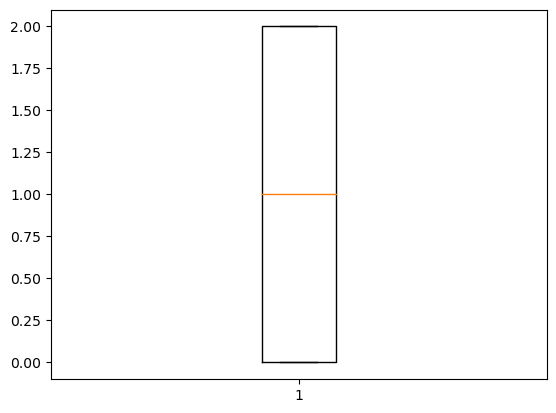

In [29]:
plt.boxplot(data['gill_spacing']) # plot boxplot for the mentioned column
plt.show()

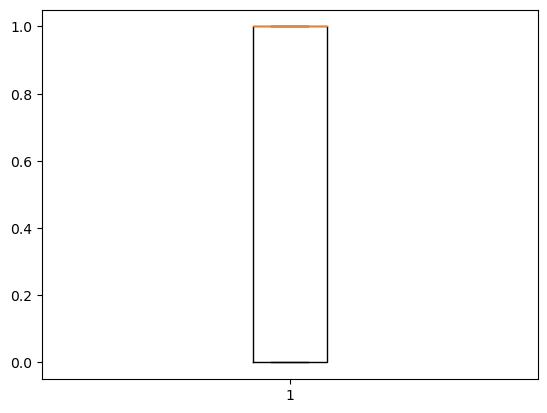

In [30]:
plt.boxplot(data['gill_size']) # plot boxplot for the mentioned column
plt.show()

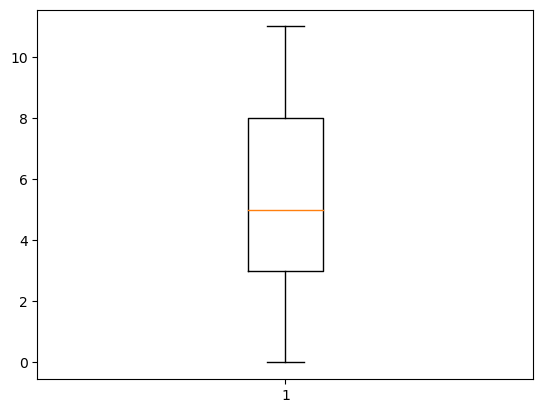

In [31]:
plt.boxplot(data['gill_color']) # plot boxplot for the mentioned column
plt.show()

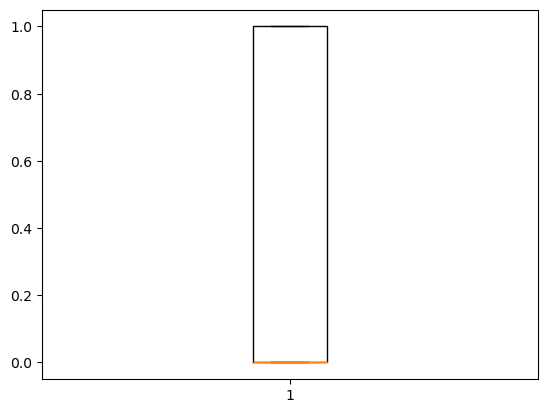

In [32]:
plt.boxplot(data['stalk_shape']) # plot boxplot for the mentioned column
plt.show()

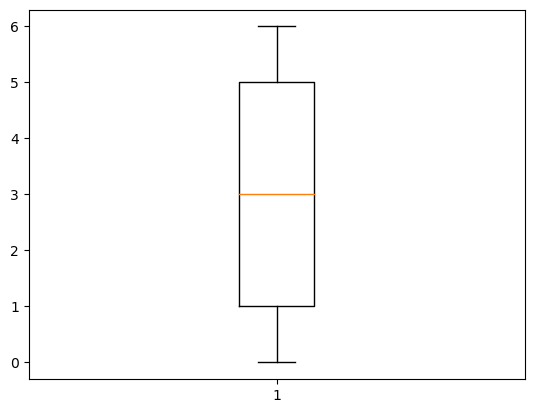

In [33]:
plt.boxplot(data['stalk_root']) # plot boxplot for the mentioned column
plt.show()

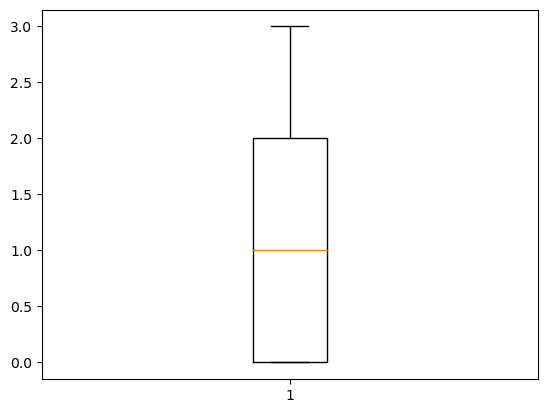

In [34]:
plt.boxplot(data['stalk_surface_above_ring']) # plot boxplot for the mentioned column
plt.show()

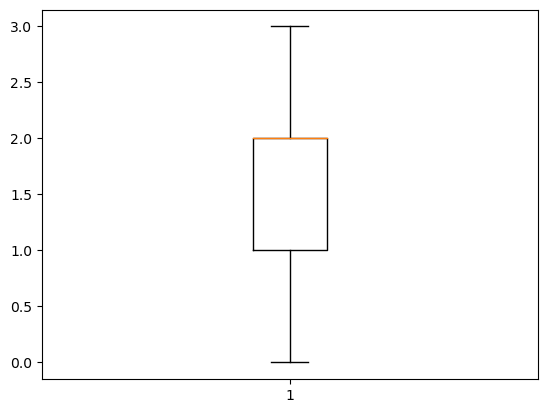

In [35]:
plt.boxplot(data['stalk_surface_below_ring']) # plot boxplot for the mentioned column
plt.show()

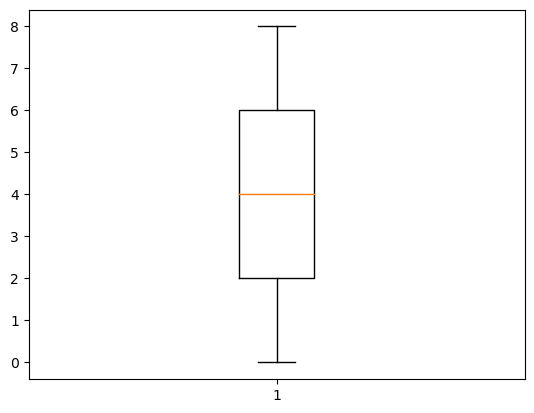

In [36]:
plt.boxplot(data['stalk_color_above_ring']) # plot boxplot for the mentioned column
plt.show()

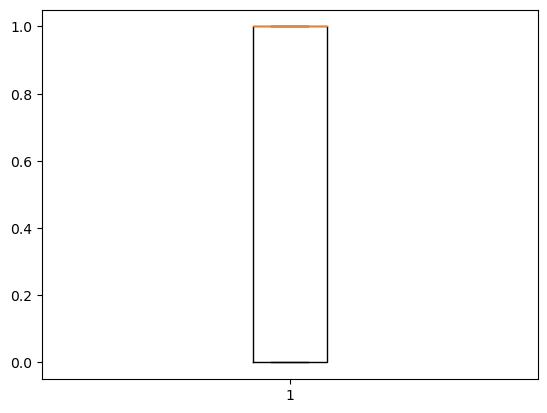

In [37]:
plt.boxplot(data['veil_type']) # plot boxplot for the mentioned column
plt.show()

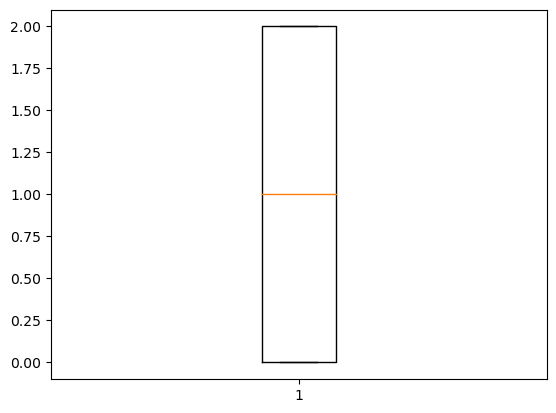

In [38]:
plt.boxplot(data['ring_number']) # plot boxplot for the mentioned column
plt.show()

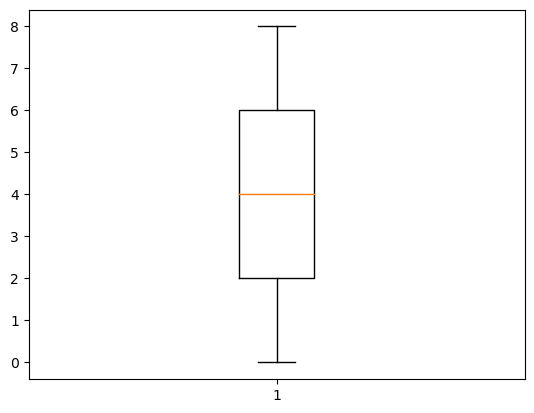

In [39]:
plt.boxplot(data['spore_print_color']) # plot boxplot for the mentioned column
plt.show()

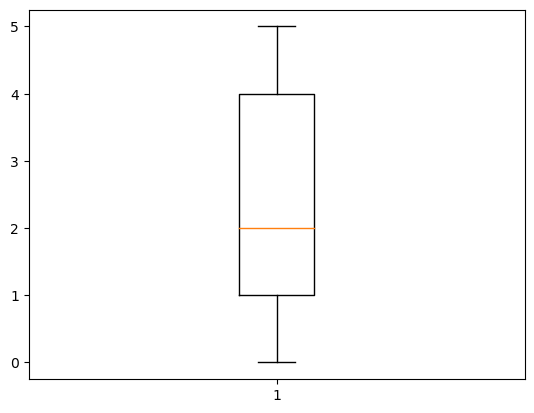

In [40]:
plt.boxplot(data['population']) # plot boxplot for the mentioned column
plt.show()

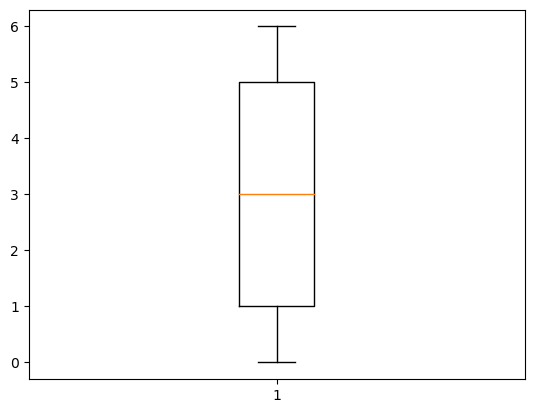

In [41]:
plt.boxplot(data['habitat']) # plot boxplot for the mentioned column
plt.show()

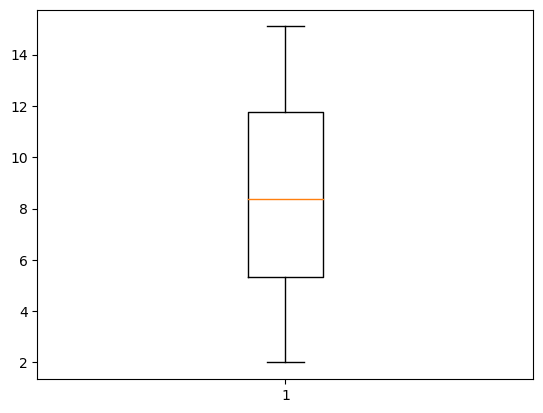

In [42]:
plt.boxplot(data['stalk_height']) # plot boxplot for the mentioned column
plt.show()

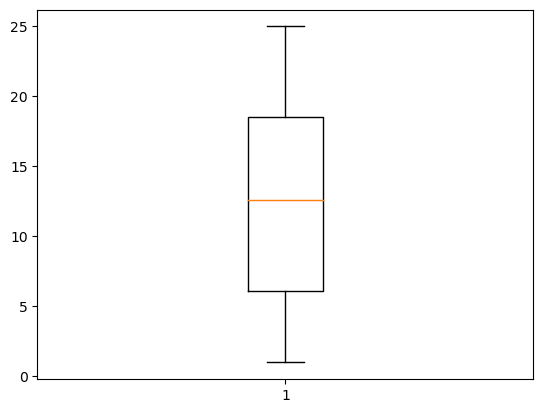

In [43]:
plt.boxplot(data['cap_diameter']) # plot boxplot for the mentioned column
plt.show()

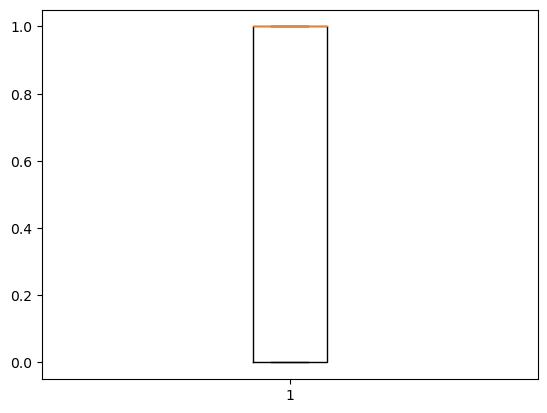

In [44]:
plt.boxplot(data['class']) # plot boxplot for the mentioned column
plt.show()

Inference: there is no outlier in our dataset and hence data is normally distributed. Mean, Median and Mode are equal for each column of our dataset

# Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

<AxesSubplot:xlabel='cap_shape', ylabel='class'>

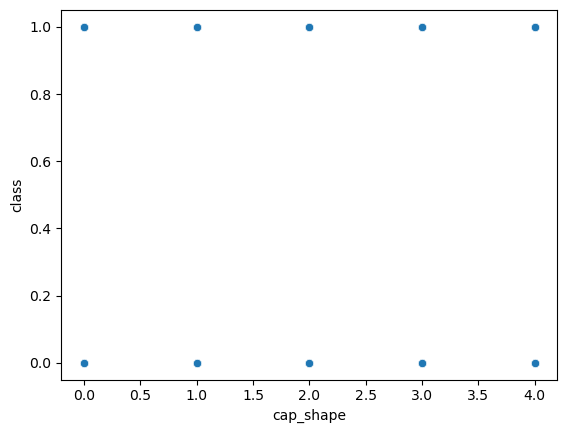

In [45]:
sns.scatterplot(x = data['cap_shape'], y = data['class'])  # plot the scatterplot between x and y

In [46]:
#sns.set_style('whitegrid')
#sns.pairplot(data, hue ='class') # pairplot (shows correlation among all the features)
#plt.show()

Inference: gill_spacing  is very vital feature in predicting the class of Y whether it's edible or poisonous  

<AxesSubplot:xlabel='cap_surface', ylabel='class'>

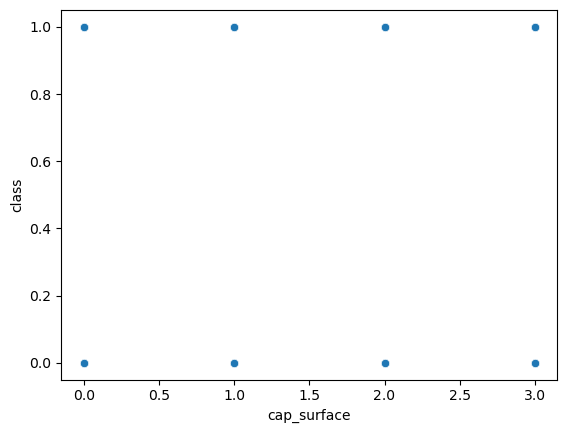

In [47]:
sns.scatterplot(x = data['cap_surface'], y = data['class'])  # plot the scatterplot between x and y

<AxesSubplot:xlabel='gill_spacing', ylabel='class'>

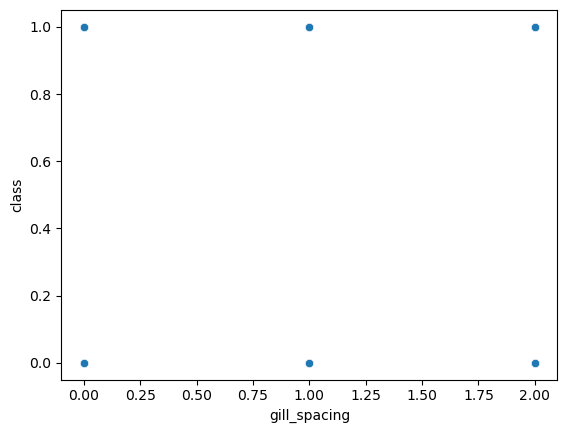

In [48]:
sns.scatterplot(x = data['gill_spacing'], y = data['class'])  # plot the scatterplot between x and y

# Visualize class distributions to gauge dataset balance or imbalance.

a dataset is said to be balance if occurence of each class in the target variable is equal or pretty closer whereas a dataset is said to be imbalance if there is a significant difference in the occurence of each class in the target variable 

1    618
0    358
Name: class, dtype: int64

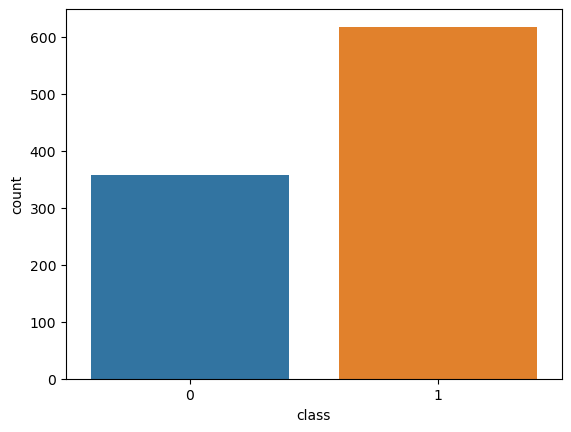

In [49]:
sns.countplot(data= data, x= data['class'])
pd.value_counts(data['class'])

class 1 (poisonous) has 618 entries and class 0 (edible) has 358 entries => (difference of 260 entries) which means our dataset is imbalanced. 

In [50]:
X = data.values[:,:-1]  # define X and Y 
Y = data.values[:,-1]

In [51]:
X

array([[ 4.        ,  2.        ,  7.        , ...,  5.        ,
        14.27617297,  5.05498292],
       [ 4.        ,  0.        ,  6.        , ...,  5.        ,
         3.95271464, 19.0683191 ],
       [ 3.        ,  1.        ,  5.        , ...,  5.        ,
         9.05426531,  7.20588371],
       ...,
       [ 4.        ,  3.        ,  5.        , ...,  0.        ,
        13.13405839, 15.74002811],
       [ 4.        ,  2.        ,  5.        , ...,  5.        ,
         6.50083964, 13.50195713],
       [ 2.        ,  2.        ,  8.        , ...,  4.        ,
        13.06641396, 21.05664242]])

In [52]:
Y

array([1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1.

In [53]:
Y = Y.astype(int) # convert Y into integer

In [54]:
Y

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,

In [55]:
print(X.shape)
print(Y.shape)

(976, 24)
(976,)


Scaling of data

In [56]:
from sklearn.preprocessing import StandardScaler # import StandardScaler function
scaler = StandardScaler() # save this func into var. scaler
scaler.fit(X)  # apply StandardScaler on X
X = scaler.transform(X) # StandardScaler function transform the values of X in predefined range of -3 to +3 

In [57]:
X

array([[ 1.35139853,  0.41028546,  1.17233895, ...,  0.99462141,
         1.55397552, -1.08020133],
       [ 1.35139853, -1.40576266,  0.79119211, ...,  0.99462141,
        -1.23528506,  0.92643459],
       [ 0.65279421, -0.4977386 ,  0.41004527, ...,  0.99462141,
         0.14308581, -0.77220366],
       ...,
       [ 1.35139853,  1.31830952,  0.41004527, ..., -1.57622207,
         1.24539141,  0.44984086],
       [ 1.35139853,  0.41028546,  0.41004527, ...,  0.99462141,
        -0.54681571,  0.12936088],
       [-0.04581012,  0.41028546,  1.55348579, ...,  0.48045272,
         1.22711479,  1.21115202]])

# Split the dataset into training and testing sets.

75% training, 25% testing => means parameter test_size = 0.25

In [58]:
from sklearn.model_selection import train_test_split # import train_test_split func from model_selection sublib.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=10) # training and testing data (model can randomly take 10 rows at a time)

In [59]:
X_train

array([[-0.04581012, -1.40576266,  1.17233895, ..., -0.03371598,
         0.80110104,  0.10139903],
       [-1.44301877, -0.4977386 ,  1.17233895, ...,  1.50879011,
         0.13595502,  0.47692838],
       [ 0.65279421,  0.41028546, -1.49568894, ...,  1.50879011,
        -1.46100039,  1.72391139],
       ...,
       [ 1.35139853,  0.41028546, -0.73339525, ..., -0.54788468,
        -0.07465652,  0.68236532],
       [ 1.35139853, -1.40576266, -1.11454209, ...,  0.48045272,
         1.34348574, -0.92759732],
       [-1.44301877, -1.40576266,  1.55348579, ..., -0.54788468,
         1.09278571, -1.09143636]])

In [60]:
X_test

array([[-0.04581012,  1.31830952, -0.73339525, ..., -0.03371598,
         1.13109136, -1.5887406 ],
       [-1.44301877, -1.40576266,  0.41004527, ...,  1.50879011,
        -0.20453648, -1.18832964],
       [-0.74441445,  0.41028546, -1.49568894, ..., -1.57622207,
         0.65679313,  1.0024917 ],
       ...,
       [-0.04581012, -1.40576266, -0.35224841, ..., -1.57622207,
         1.52174524,  0.18861943],
       [-1.44301877,  0.41028546,  0.41004527, ..., -0.03371598,
         0.36718732,  0.44962904],
       [ 0.65279421,  0.41028546, -0.73339525, ...,  1.50879011,
         1.3753585 ,  1.1555373 ]])

In [61]:
Y_train

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,

In [62]:
Y_test

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0])

In [63]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(732, 24)
(244, 24)
(732,)
(244,)


# Task 4: SVM Implementation


Implement a basic SVM classifier using Python libraries like scikit-learn.

Train the SVM model on the training data.


How SVM algorithm works?

The extreme data point of a class which is closest to the next class is known as Support Vector. A hyperplane is drawn on the support vectors and in between the hyperplane, a partition line is drawn. This partition line also known as maximum margin hyperplane separates the two classes. 

In [64]:
from sklearn.svm import SVC # import SVC (Support Vector Classifier)function from svm sublib. 
svc_model= SVC(kernel='rbf', gamma=0.01, C =20)  # pass hyperparameters to this function
svc_model.fit(X_train,Y_train)  # train the model using SVC algorithm


SVC(C=20, gamma=0.01)

In [65]:
Y_pred = svc_model.predict(X_test) # predict the class of Y for the given testing data

In [66]:
Y_pred  # 'edible': 0, 'poisonous': 1

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1])

In [67]:
print(list(zip(Y_test, Y_pred))) # compare actual Y with predicted Y

[(0, 1), (1, 1), (1, 0), (1, 1), (0, 0), (1, 1), (0, 1), (0, 1), (1, 0), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (0, 1), (0, 1), (1, 1), (1, 0), (1, 1), (1, 0), (1, 1), (1, 1), (0, 1), (1, 0), (1, 1), (1, 1), (1, 0), (0, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (1, 0), (1, 1), (0, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 1), (0, 1), (1, 1), (0, 1), (1, 1), (0, 1), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (0, 1), (1, 0), (1, 0), (0, 1), (0, 1), (0, 1), (1, 0), (1, 0), (1, 1), (1, 0), (1, 1), (1, 0), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 0), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (0, 1), (1, 1), (0, 0), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (0, 1), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 1), (0, 1), (1, 1), (1, 0), (1, 0), (0, 1), (0, 0), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1),

In [68]:
svc_model.score(X_train, Y_train) # score of the model on training data

0.8483606557377049

# Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report # import these functions from metrics sublib.
cfm = confusion_matrix(Y_test,Y_pred)  #confusion matrix
print(cfm)

print('classification report')  # classification report
print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)  # accuracy of the model
print('accuracy of the model:',acc)

[[ 18  82]
 [ 37 107]]
classification report
              precision    recall  f1-score   support

           0       0.33      0.18      0.23       100
           1       0.57      0.74      0.64       144

    accuracy                           0.51       244
   macro avg       0.45      0.46      0.44       244
weighted avg       0.47      0.51      0.47       244

accuracy of the model: 0.5122950819672131


Confusion matrix is a matrix which represents the summary of the prediction results on a classification problem.

Precision means percentage of True positive predictions among all positive predictions made by the model. It is calculated as the ratio of TP to the sum of TP and false positives (FP).

F1 Score is a metric that balances precision and recall. It is calculated as the mean of precision and recall.

recall is the accuracy of individual class.

Inference: accuracy of Class 0 (edible) is only 18% whereas accuracy of class 1(poisonous) is good which is 74%. In our dataset, there are 600 enteries for class 0 and 1400 entries for class 1 which means the amount of training data is much more in class 1 as compared to class 0. Hence, our model tend to get bias towards class 1 due to more amount of training data. That's why, performance of our model on class 1 is much better than class 0 

accuracy of the model: 51% which is very low. It's only because, our classification model worked on imbalanced dataset. So, let's balance the dataset using oversampling. In oversampling, no. of samples added to minority class until minority & majority class have equal distribution of data   -> again train the model

In [70]:
from collections import Counter
counter = Counter(data['class'])

In [71]:
counter   # difference of 260 entries between class 1(poisonous) and class 0 (edible)

Counter({1: 618, 0: 358})

In [72]:
X = data.values[:,:-1]  # define X and Y 
Y = data.values[:,-1]

In [73]:
X

array([[ 4.        ,  2.        ,  7.        , ...,  5.        ,
        14.27617297,  5.05498292],
       [ 4.        ,  0.        ,  6.        , ...,  5.        ,
         3.95271464, 19.0683191 ],
       [ 3.        ,  1.        ,  5.        , ...,  5.        ,
         9.05426531,  7.20588371],
       ...,
       [ 4.        ,  3.        ,  5.        , ...,  0.        ,
        13.13405839, 15.74002811],
       [ 4.        ,  2.        ,  5.        , ...,  5.        ,
         6.50083964, 13.50195713],
       [ 2.        ,  2.        ,  8.        , ...,  4.        ,
        13.06641396, 21.05664242]])

In [74]:
Y

array([1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1.

In [75]:
print(X.shape)
print(Y.shape)

(976, 24)
(976,)


In [76]:
from imblearn.over_sampling import SMOTE  # import SMOTE func from sublib over_sampling
smote = SMOTE()                    # save func in smote var.
X, Y = smote.fit_resample(X, Y)   # it will add synthetic data points to minority class

In [77]:
X

array([[ 4.        ,  2.        ,  7.        , ...,  5.        ,
        14.27617297,  5.05498292],
       [ 4.        ,  0.        ,  6.        , ...,  5.        ,
         3.95271464, 19.0683191 ],
       [ 3.        ,  1.        ,  5.        , ...,  5.        ,
         9.05426531,  7.20588371],
       ...,
       [ 2.55939871,  1.48020043,  4.51979957, ...,  4.07919828,
         9.20742122, 13.20888929],
       [ 1.6360738 ,  0.7278524 ,  6.2721476 , ...,  2.6360738 ,
        11.47907337, 13.12101793],
       [ 3.31208053,  0.31208053,  6.43959735, ...,  4.68791947,
        12.82650969, 23.99169435]])

In [78]:
Y

array([1., 0., 1., ..., 0., 0., 0.])

In [79]:
print(X.shape)     # 260 rows are added 
print(Y.shape)

(1236, 24)
(1236,)


In [80]:
counter = Counter(Y)

In [81]:
counter   # equal distribution of data 

Counter({1.0: 618, 0.0: 618})

In [82]:
from sklearn.preprocessing import StandardScaler # import StandardScaler function
scaler = StandardScaler() # save this func into var. scaler
scaler.fit(X)  # apply StandardScaler on X
X = scaler.transform(X) # StandardScaler function transform the values of X in predefined range of -3 to +3 

In [83]:
X

array([[ 1.36521789,  0.41960075,  1.18939389, ...,  1.02138535,
         1.54017879, -1.10178647],
       [ 1.36521789, -1.46984764,  0.80210496, ...,  1.02138535,
        -1.27303128,  0.90894367],
       [ 0.64947116, -0.52512345,  0.41481603, ...,  1.02138535,
         0.11717472, -0.79316038],
       ...,
       [ 0.33411223, -0.07146648,  0.22883972, ...,  0.53316278,
         0.15891071,  0.06819227],
       [-0.32675456, -0.78222787,  0.90750471, ..., -0.23200297,
         0.77795081,  0.05558388],
       [ 0.87284178, -1.17501762,  0.97235615, ...,  0.85591568,
         1.14513604,  1.61538352]])

In [84]:
from sklearn.model_selection import train_test_split # import train_test_split func from model_selection sublib.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=10) # training and testing data (model can randomly take 10 rows at a time)

In [85]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(927, 24)
(309, 24)
(927,)
(309,)


In [86]:
from sklearn.svm import SVC # import SVC (Support Vector Classifier)function from svm sublib. 
svc_model= SVC(kernel='rbf', gamma=0.01, C =20)  # pass hyperparameters to this function
svc_model.fit(X_train,Y_train)  # train the model using SVC algorithm

SVC(C=20, gamma=0.01)

In [87]:
Y_pred = svc_model.predict(X_test) # predict the class of Y for the given testing data

In [88]:
Y_pred  # 'edible': 0, 'poisonous': 1

array([0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0.

In [89]:
print(list(zip(Y_test, Y_pred))) # compare actual Y with predicted Y

[(1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (0.0, 1.0), (0.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (1.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.

In [90]:
svc_model.score(X_train, Y_train) # score of the model on training data

0.8781014023732471

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report # import these functions from metrics sublib.
cfm = confusion_matrix(Y_test,Y_pred)  #confusion matrix
print(cfm)

print('classification report')  # classification report
print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)  # accuracy of the model
print('accuracy of the model:',acc)

[[103  47]
 [ 71  88]]
classification report
              precision    recall  f1-score   support

         0.0       0.59      0.69      0.64       150
         1.0       0.65      0.55      0.60       159

    accuracy                           0.62       309
   macro avg       0.62      0.62      0.62       309
weighted avg       0.62      0.62      0.62       309

accuracy of the model: 0.6181229773462783


Accuracy of the model has improved from 51% to 60% 

# Task 5: Visualization of SVM Results

Visualize classification results on the testing data.

# Let's plot decision boundary of linear SVM model

In [92]:
X = X[:,:2]  # (only first 2 features for vizualization)
Y = Y

In [93]:
X

array([[ 1.36521789,  0.41960075],
       [ 1.36521789, -1.46984764],
       [ 0.64947116, -0.52512345],
       ...,
       [ 0.33411223, -0.07146648],
       [-0.32675456, -0.78222787],
       [ 0.87284178, -1.17501762]])

In [94]:
Y

array([1., 0., 1., ..., 0., 0., 0.])

In [95]:
print(X.shape)
print(Y.shape)

(1236, 2)
(1236,)


To plot decision boundary, we need not to split data into train & test because we have to test the model on completely different data x_in in place of X_test. However if we do train and test split, we will get the same decision boundary. 

In [96]:
from sklearn.svm import SVC # import SVC (Support Vector Classifier)function from svm sublib. 
svc_model= SVC(kernel='linear')  # pass hyperparameters to this function
svc_model.fit(X,Y)  # train the model using SVC algorithm

SVC(kernel='linear')

In [97]:
x_min,x_max = X[:,0].min()-0.1, X[:,0].max()+0.1  # min value of x coordinate with padding, max value of x coordinate with padding

y_min,y_max = X[:,1].min()-0.1, X[:,1].max()+0.1 # min value of y coordinate with padding, max value of y coordinate with padding 

padding is the space between border and data in a rectangle. Padding ensure that the data does not flush against the border of rectangle. Here, 0.1 is padding value

In [98]:
print(x_min)
print(x_max)
print(y_min)
print(y_max)

-1.5977690251049423
1.465217893236374
-1.5698476430917643
1.4643249435233117


In [99]:
import numpy as np
np.arange(x_min, x_max, 0.02)

array([-1.59776903, -1.57776903, -1.55776903, -1.53776903, -1.51776903,
       -1.49776903, -1.47776903, -1.45776903, -1.43776903, -1.41776903,
       -1.39776903, -1.37776903, -1.35776903, -1.33776903, -1.31776903,
       -1.29776903, -1.27776903, -1.25776903, -1.23776903, -1.21776903,
       -1.19776903, -1.17776903, -1.15776903, -1.13776903, -1.11776903,
       -1.09776903, -1.07776903, -1.05776903, -1.03776903, -1.01776903,
       -0.99776903, -0.97776903, -0.95776903, -0.93776903, -0.91776903,
       -0.89776903, -0.87776903, -0.85776903, -0.83776903, -0.81776903,
       -0.79776903, -0.77776903, -0.75776903, -0.73776903, -0.71776903,
       -0.69776903, -0.67776903, -0.65776903, -0.63776903, -0.61776903,
       -0.59776903, -0.57776903, -0.55776903, -0.53776903, -0.51776903,
       -0.49776903, -0.47776903, -0.45776903, -0.43776903, -0.41776903,
       -0.39776903, -0.37776903, -0.35776903, -0.33776903, -0.31776903,
       -0.29776903, -0.27776903, -0.25776903, -0.23776903, -0.21

In [100]:
np.arange(x_min, x_max, 0.02).shape

(154,)

In [101]:
np.arange(y_min, y_max, 0.02)

array([-1.56984764, -1.54984764, -1.52984764, -1.50984764, -1.48984764,
       -1.46984764, -1.44984764, -1.42984764, -1.40984764, -1.38984764,
       -1.36984764, -1.34984764, -1.32984764, -1.30984764, -1.28984764,
       -1.26984764, -1.24984764, -1.22984764, -1.20984764, -1.18984764,
       -1.16984764, -1.14984764, -1.12984764, -1.10984764, -1.08984764,
       -1.06984764, -1.04984764, -1.02984764, -1.00984764, -0.98984764,
       -0.96984764, -0.94984764, -0.92984764, -0.90984764, -0.88984764,
       -0.86984764, -0.84984764, -0.82984764, -0.80984764, -0.78984764,
       -0.76984764, -0.74984764, -0.72984764, -0.70984764, -0.68984764,
       -0.66984764, -0.64984764, -0.62984764, -0.60984764, -0.58984764,
       -0.56984764, -0.54984764, -0.52984764, -0.50984764, -0.48984764,
       -0.46984764, -0.44984764, -0.42984764, -0.40984764, -0.38984764,
       -0.36984764, -0.34984764, -0.32984764, -0.30984764, -0.28984764,
       -0.26984764, -0.24984764, -0.22984764, -0.20984764, -0.18

In [102]:
np.arange(y_min, y_max, 0.02).shape

(152,)

In [103]:
import numpy as np
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02)) # create a meshgrid to plot decision boundary

In [104]:
xx

array([[-1.59776903, -1.57776903, -1.55776903, ...,  1.42223097,
         1.44223097,  1.46223097],
       [-1.59776903, -1.57776903, -1.55776903, ...,  1.42223097,
         1.44223097,  1.46223097],
       [-1.59776903, -1.57776903, -1.55776903, ...,  1.42223097,
         1.44223097,  1.46223097],
       ...,
       [-1.59776903, -1.57776903, -1.55776903, ...,  1.42223097,
         1.44223097,  1.46223097],
       [-1.59776903, -1.57776903, -1.55776903, ...,  1.42223097,
         1.44223097,  1.46223097],
       [-1.59776903, -1.57776903, -1.55776903, ...,  1.42223097,
         1.44223097,  1.46223097]])

In [105]:
yy

array([[-1.56984764, -1.56984764, -1.56984764, ..., -1.56984764,
        -1.56984764, -1.56984764],
       [-1.54984764, -1.54984764, -1.54984764, ..., -1.54984764,
        -1.54984764, -1.54984764],
       [-1.52984764, -1.52984764, -1.52984764, ..., -1.52984764,
        -1.52984764, -1.52984764],
       ...,
       [ 1.41015236,  1.41015236,  1.41015236, ...,  1.41015236,
         1.41015236,  1.41015236],
       [ 1.43015236,  1.43015236,  1.43015236, ...,  1.43015236,
         1.43015236,  1.43015236],
       [ 1.45015236,  1.45015236,  1.45015236, ...,  1.45015236,
         1.45015236,  1.45015236]])

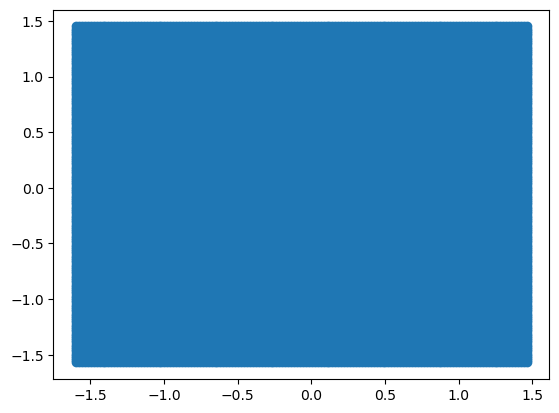

In [106]:
plt.scatter(xx,yy)
plt.show()

In [107]:
print(xx.shape)
print(yy.shape)

(152, 154)
(152, 154)


In [108]:
xx.ravel()  # ravel function is used to convert 2-D xx into 1-D  

array([-1.59776903, -1.57776903, -1.55776903, ...,  1.42223097,
        1.44223097,  1.46223097])

In [109]:
yy.ravel()

array([-1.56984764, -1.56984764, -1.56984764, ...,  1.45015236,
        1.45015236,  1.45015236])

In [110]:
print(xx.ravel().shape)
print(yy.ravel().shape)

(23408,)
(23408,)


In [111]:
x_in = np.c_[xx.ravel(),yy.ravel()] # concatenate elements of 1st row and 2nd row of both the arrays 

In [112]:
x_in

array([[-1.59776903, -1.56984764],
       [-1.57776903, -1.56984764],
       [-1.55776903, -1.56984764],
       ...,
       [ 1.42223097,  1.45015236],
       [ 1.44223097,  1.45015236],
       [ 1.46223097,  1.45015236]])

In [113]:
x_in.shape

(23408, 2)

In [114]:
Y_pred_model = svc_model.predict(x_in)   # test the linear SVM model on x_in

In [115]:
Y_pred_model  # 1 means poisonous and 0 means edible

array([1., 1., 1., ..., 0., 0., 0.])

In [116]:
Y_pred_model.shape

(23408,)

In [117]:
Y_pred_model = Y_pred_model.reshape(xx.shape)  # reshaping 

In [118]:
Y_pred_model.shape

(152, 154)

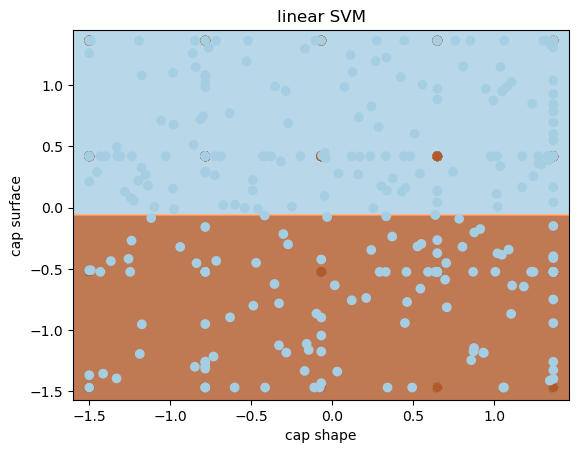

In [119]:
plt.contourf(xx, yy, Y_pred_model, cmap = plt.cm.Paired, alpha =0.8) # plot decision boundary of KNN
plt.scatter(X[:,0], X[:,1], c=Y, cmap = plt.cm.Paired) # scatter plot of samples
plt.title("linear SVM")
plt.xlabel('cap shape')
plt.ylabel('cap surface')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()

In above visualization, linear SVM model has classified the data points in a linear way. However, the accuracy of the model is very poor as we can see red section has tons of misclassified data points. That's why, here non- linear SVM will come into picture

# Visualise non linear SVM model

In [120]:
from sklearn.svm import SVC # import SVC (Support Vector Classifier)function from svm sublib. 
svc_model= SVC(kernel='rbf', gamma = 0.1)  # pass hyperparameters to this function
svc_model.fit(X,Y)  # train the model using SVC algorithm

SVC(gamma=0.1)

In [121]:
Y_pred_model = svc_model.predict(x_in)  # test the non-linear SVM model on x_in

In [122]:
Y_pred_model # 1 means poisonous and 0 means edible

array([1., 1., 1., ..., 1., 1., 1.])

In [123]:
Y_pred_model.shape

(23408,)

In [124]:
Y_pred_model = Y_pred_model.reshape(xx.shape)  #reshaping

In [125]:
Y_pred_model.shape

(152, 154)

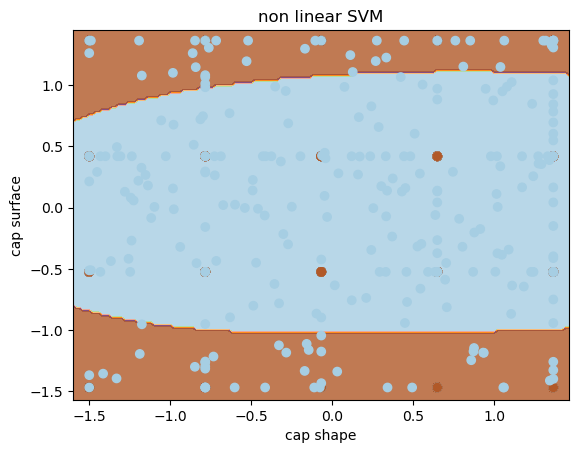

In [126]:
plt.contourf(xx, yy, Y_pred_model, cmap = plt.cm.Paired, alpha =0.8) # plot decision boundary of KNN
plt.scatter(X[:,0], X[:,1], c=Y, cmap = plt.cm.Paired) # scatter plot of samples
plt.title("non linear SVM")
plt.xlabel('cap shape')
plt.ylabel('cap surface')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()

non linear SVM model has classified the data points in a non linear way. At low value of gamma, our non linear model performs better than linear model but still accuracy is not so good. So, let's take, some higher value of gamma (let's say 200)

In [127]:
from sklearn.svm import SVC # import SVC (Support Vector Classifier)function from svm sublib. 
svc_model= SVC(kernel='rbf', gamma = 200)  # pass hyperparameters to this function
svc_model.fit(X,Y)  # train the model using SVC algorithm

SVC(gamma=200)

In [128]:
Y_pred_model = svc_model.predict(x_in)  # test the non-linear SVM model on x_in

In [129]:
Y_pred_model  # 0 means edible class

array([0., 0., 0., ..., 0., 0., 0.])

In [130]:
Y_pred_model.shape

(23408,)

In [131]:
Y_pred_model = Y_pred_model.reshape(xx.shape)  #reshaping

In [132]:
Y_pred_model.shape

(152, 154)

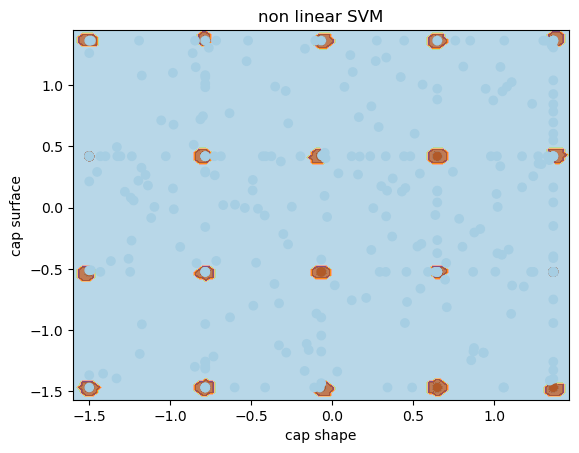

In [133]:
plt.contourf(xx, yy, Y_pred_model, cmap = plt.cm.Paired, alpha =0.8) # plot decision boundary of KNN
plt.scatter(X[:,0], X[:,1], c=Y, cmap = plt.cm.Paired) # scatter plot of samples
plt.title("non linear SVM")
plt.xlabel('cap shape')
plt.ylabel('cap surface')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()

At higher value of gamma, our non linear model has classified the data points much better

# Task 6: Parameter Tuning and Optimization

Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

Case 1: kernel = 'linear' , gamma = 0.01 , C = 1   # C is regularization parameter

Case 2: kernel = 'rbf' , gamma = 0.01, C = 10

Case 3: kernel = 'poly' , gamma = 0.01 , C = 50

Case 4: kernel = 'sigmoid' , gamma = 0.01, C =100


In [134]:
X = data.values[:,:-1]  # define X and Y 
Y = data.values[:,-1]

In [135]:
from imblearn.over_sampling import SMOTE  # import SMOTE func from sublib over_sampling
smote = SMOTE()                    # save func in smote var.
X, Y = smote.fit_resample(X, Y)   # it will add synthetic data points to minority class

In [136]:
from sklearn.preprocessing import StandardScaler # import StandardScaler function
scaler = StandardScaler() # save this func into var. scaler
scaler.fit(X)  # apply StandardScaler on X
X = scaler.transform(X) # StandardScaler function transform the values of X in predefined range of -3 to +3 

In [137]:
from sklearn.model_selection import train_test_split # import train_test_split func from model_selection sublib.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=10) # training and testing data (model can randomly take 10 rows at a time)

In [138]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(927, 24)
(309, 24)
(927,)
(309,)


# Case 1

In [139]:
from sklearn.svm import SVC # import SVC (Support Vector Classifier)function from svm sublib. 
svc_model= SVC(kernel='linear', gamma=0.01, C =1)  # pass hyperparameters to this function
svc_model.fit(X_train,Y_train)  # train the model using SVC algorithm

SVC(C=1, gamma=0.01, kernel='linear')

In [140]:
Y_pred = svc_model.predict(X_test) # predict the class of Y for the given testing data

In [141]:
Y_pred

array([0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1.

In [142]:
svc_model.score(X_train, Y_train) # score of the model on training data

0.5717367853290184

In [143]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report # import these functions from metrics sublib.
cfm = confusion_matrix(Y_test,Y_pred)  #confusion matrix
print(cfm)

print('classification report')  # classification report
print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)  # accuracy of the model
print('accuracy of the model:',acc)

[[77 73]
 [79 80]]
classification report
              precision    recall  f1-score   support

         0.0       0.49      0.51      0.50       150
         1.0       0.52      0.50      0.51       159

    accuracy                           0.51       309
   macro avg       0.51      0.51      0.51       309
weighted avg       0.51      0.51      0.51       309

accuracy of the model: 0.5080906148867314


# Case 2

In [144]:
from sklearn.svm import SVC # import SVC (Support Vector Classifier)function from svm sublib. 
svc_model= SVC(kernel='rbf', gamma=0.01, C =10)  # pass hyperparameters to this function
svc_model.fit(X_train,Y_train)  # train the model using SVC algorithm

SVC(C=10, gamma=0.01)

In [145]:
Y_pred = svc_model.predict(X_test) # predict the class of Y for the given testing data

In [146]:
svc_model.score(X_train, Y_train) # score of the model on training data

0.8360302049622438

In [147]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report # import these functions from metrics sublib.
cfm = confusion_matrix(Y_test,Y_pred)  #confusion matrix
print(cfm)

print('classification report')  # classification report
print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)  # accuracy of the model
print('accuracy of the model:',acc)

[[99 51]
 [84 75]]
classification report
              precision    recall  f1-score   support

         0.0       0.54      0.66      0.59       150
         1.0       0.60      0.47      0.53       159

    accuracy                           0.56       309
   macro avg       0.57      0.57      0.56       309
weighted avg       0.57      0.56      0.56       309

accuracy of the model: 0.5631067961165048


# Case3

In [148]:
from sklearn.svm import SVC # import SVC (Support Vector Classifier)function from svm sublib. 
svc_model= SVC(kernel='poly', gamma=0.01, C =50)  # pass hyperparameters to this function
svc_model.fit(X_train,Y_train)  # train the model using SVC algorithm

SVC(C=50, gamma=0.01, kernel='poly')

In [149]:
Y_pred = svc_model.predict(X_test) # predict the class of Y for the given testing data

In [150]:
svc_model.score(X_train, Y_train) # score of the model on training data

0.9460625674217907

In [151]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report # import these functions from metrics sublib.
cfm = confusion_matrix(Y_test,Y_pred)  #confusion matrix
print(cfm)

print('classification report')  # classification report
print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)  # accuracy of the model
print('accuracy of the model:',acc)

[[117  33]
 [ 82  77]]
classification report
              precision    recall  f1-score   support

         0.0       0.59      0.78      0.67       150
         1.0       0.70      0.48      0.57       159

    accuracy                           0.63       309
   macro avg       0.64      0.63      0.62       309
weighted avg       0.65      0.63      0.62       309

accuracy of the model: 0.627831715210356


# Case 4

In [152]:
from sklearn.svm import SVC # import SVC (Support Vector Classifier)function from svm sublib. 
svc_model= SVC(kernel='sigmoid', gamma=0.01, C =100)  # pass hyperparameters to this function
svc_model.fit(X_train,Y_train)  # train the model using SVC algorithm

SVC(C=100, gamma=0.01, kernel='sigmoid')

In [153]:
Y_pred = svc_model.predict(X_test) # predict the class of Y for the given testing data

In [154]:
Y_pred  # 'edible': 0, 'poisonous': 1

array([0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1.

In [155]:
svc_model.score(X_train, Y_train) # score of the model on training data

0.3516720604099245

In [156]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report # import these functions from metrics sublib.
cfm = confusion_matrix(Y_test,Y_pred)  #confusion matrix
print(cfm)

print('classification report')  # classification report
print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)  # accuracy of the model
print('accuracy of the model:',acc)

[[59 91]
 [79 80]]
classification report
              precision    recall  f1-score   support

         0.0       0.43      0.39      0.41       150
         1.0       0.47      0.50      0.48       159

    accuracy                           0.45       309
   macro avg       0.45      0.45      0.45       309
weighted avg       0.45      0.45      0.45       309

accuracy of the model: 0.44983818770226536


Case 3: kernel = 'poly' , gamma = 0.01 , C = 50  gives best accuracy of the model for this dataset which is 61%

# Task 7: Comparison and Analysis

Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

# kernel='linear'

In [157]:
from sklearn.svm import SVC # import SVC (Support Vector Classifier)function from svm sublib. 
svc_model= SVC(kernel='linear', gamma=0.01, C =20)  # pass hyperparameters to this function
svc_model.fit(X_train,Y_train)  # train the model using SVC algorithm

SVC(C=20, gamma=0.01, kernel='linear')

In [158]:
Y_pred = svc_model.predict(X_test) # predict the class of Y for the given testing data

In [159]:
Y_pred

array([0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1.

In [160]:
svc_model.score(X_train, Y_train) # score of the model on training data

0.5717367853290184

In [161]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report # import these functions from metrics sublib.
cfm = confusion_matrix(Y_test,Y_pred)  #confusion matrix
print(cfm)

print('classification report')  # classification report
print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)  # accuracy of the model
print('accuracy of the model:',acc)

[[77 73]
 [79 80]]
classification report
              precision    recall  f1-score   support

         0.0       0.49      0.51      0.50       150
         1.0       0.52      0.50      0.51       159

    accuracy                           0.51       309
   macro avg       0.51      0.51      0.51       309
weighted avg       0.51      0.51      0.51       309

accuracy of the model: 0.5080906148867314


# kernel ='Poly'

In [162]:
from sklearn.svm import SVC # import SVC (Support Vector Classifier)function from svm sublib. 
svc_model= SVC(kernel='poly', gamma=0.01, C =20)  # pass hyperparameters to this function
svc_model.fit(X_train,Y_train)  # train the model using SVC algorithm

SVC(C=20, gamma=0.01, kernel='poly')

In [163]:
Y_pred = svc_model.predict(X_test) # predict the class of Y for the given testing data

In [164]:
svc_model.score(X_train, Y_train) # score of the model on training data

0.8511326860841424

In [165]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report # import these functions from metrics sublib.
cfm = confusion_matrix(Y_test,Y_pred)  #confusion matrix
print(cfm)

print('classification report')  # classification report
print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)  # accuracy of the model
print('accuracy of the model:',acc)

[[122  28]
 [ 96  63]]
classification report
              precision    recall  f1-score   support

         0.0       0.56      0.81      0.66       150
         1.0       0.69      0.40      0.50       159

    accuracy                           0.60       309
   macro avg       0.63      0.60      0.58       309
weighted avg       0.63      0.60      0.58       309

accuracy of the model: 0.598705501618123


# kernel ='sigmoid'

In [166]:
from sklearn.svm import SVC # import SVC (Support Vector Classifier)function from svm sublib. 
svc_model= SVC(kernel='sigmoid', gamma=0.01, C =20)  # pass hyperparameters to this function
svc_model.fit(X_train,Y_train)  # train the model using SVC algorithm

SVC(C=20, gamma=0.01, kernel='sigmoid')

In [167]:
Y_pred = svc_model.predict(X_test) # predict the class of Y for the given testing data

In [168]:
svc_model.score(X_train, Y_train) # score of the model on training data

0.5221143473570659

In [169]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report # import these functions from metrics sublib.
cfm = confusion_matrix(Y_test,Y_pred)  #confusion matrix
print(cfm)

print('classification report')  # classification report
print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)  # accuracy of the model
print('accuracy of the model:',acc)

[[66 84]
 [81 78]]
classification report
              precision    recall  f1-score   support

         0.0       0.45      0.44      0.44       150
         1.0       0.48      0.49      0.49       159

    accuracy                           0.47       309
   macro avg       0.47      0.47      0.47       309
weighted avg       0.47      0.47      0.47       309

accuracy of the model: 0.46601941747572817


# kernel = 'rbf'

In [170]:
from sklearn.svm import SVC # import SVC (Support Vector Classifier)function from svm sublib. 
svc_model= SVC(kernel='rbf', gamma=0.01, C =20)  # pass hyperparameters to this function
svc_model.fit(X_train,Y_train)  # train the model using SVC algorithm

SVC(C=20, gamma=0.01)

In [171]:
Y_pred = svc_model.predict(X_test) # predict the class of Y for the given testing data

In [172]:
svc_model.score(X_train, Y_train) # score of the model on training data

0.883495145631068

In [173]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report # import these functions from metrics sublib.
cfm = confusion_matrix(Y_test,Y_pred)  #confusion matrix
print(cfm)

print('classification report')  # classification report
print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)  # accuracy of the model
print('accuracy of the model:',acc)

[[103  47]
 [ 86  73]]
classification report
              precision    recall  f1-score   support

         0.0       0.54      0.69      0.61       150
         1.0       0.61      0.46      0.52       159

    accuracy                           0.57       309
   macro avg       0.58      0.57      0.57       309
weighted avg       0.58      0.57      0.56       309

accuracy of the model: 0.56957928802589


Best accuracy of the model is 59% achieved when kernel = 'poly'

# Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

SVMs have several advantages, such as the ability to handle high-dimensional data. They also have the ability to model non-linear decision boundaries, which can be very useful in many applications. However, SVMs can be sensitive to the choice of kernel, and they can be computationally expensive when the dataset is large.

# Discuss practical implications of SVM in real-world classification tasks.

SVMs are applied in image classification tasks such as object detection and image retrieval. It can also be useful in security domains, classifying an image as one that has been tampered with. SVMs are also used for protein classification, gene expression analysis, and disease diagnosis.

# Deployment with Streamlit:

In [174]:
import pickle  #import pickle library
pickle_out = open("support.pkl", "wb") # create the pickle file named as support.pkl
pickle.dump(svc_model, pickle_out) # SVM model saved in var. svc_model
pickle_out.close()

after execution of above code line, support.pkl file will be saved in our local directory. We need to create front end web where by using streamlit library , we can able to access the model and as soon as we give the input, we will able to get the output.
Now we can get down to using Streamlit to deploy the model and for that, first install the streamlit lib.